# WeatherPy

---

In [23]:
# Dependencies and Setup
from citipy import citipy
import numpy as np
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import OpenWeatherMap API key
from api_key import weather_key

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Showcase the relationship between different weather variables and Latitude. First...

### Retrieve weather data from the cities list

In [6]:
# Set the API base URL and units
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Empty list to store city weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}appid={weather_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind_speed = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | comodoro rivadavia
Processing Record 3 of Set 1 | tosno
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | cairns
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | shelburne
Processing Record 9 of Set 1 | velenje
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | viligili
City not found. Skipping...
Processing Record 13 of Set 1 | placido de castro
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | takoradi
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | blackwater
Processing Record 19 of Set 1 | lubango
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | tucuman
Processing

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show count and head to ensure accuracy
print(city_data_df.count())
city_data_df.head(10)

http://api.openweathermap.org/data/2.5/weather?appid=3636be8971c08e10744a37fa8adab19b&units=imperial&q=halalo
City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,75.52,90,75,17.27,US,1675625133
1,comodoro rivadavia,-45.8667,-67.5000,75.06,23,0,12.66,AR,1675625230
2,tosno,59.5400,30.8775,22.84,85,100,7.25,RU,1675625099
3,vila velha,-20.3297,-40.2925,85.95,77,20,19.57,BR,1675625372
4,kaitangata,-46.2817,169.8464,59.13,84,100,14.99,NZ,1675625373
5,cairns,-16.9167,145.7667,80.55,94,100,5.75,AU,1675625373
6,qaanaaq,77.4840,-69.3632,-2.72,62,0,9.37,GL,1675625202
7,shelburne,44.0787,-80.2041,36.90,79,100,15.73,CA,1675625374
8,velenje,46.3592,15.1103,27.82,66,100,1.30,SI,1675625374
9,upernavik,72.7868,-56.1549,-14.06,95,100,1.41,GL,1675625194


In [11]:
# Export city_data to csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,75.52,90,75,17.27,US,1675625133
1,comodoro rivadavia,-45.8667,-67.5000,75.06,23,0,12.66,AR,1675625230
2,tosno,59.5400,30.8775,22.84,85,100,7.25,RU,1675625099
3,vila velha,-20.3297,-40.2925,85.95,77,20,19.57,BR,1675625372
4,kaitangata,-46.2817,169.8464,59.13,84,100,14.99,NZ,1675625373


### Latitude Vs. Temperature

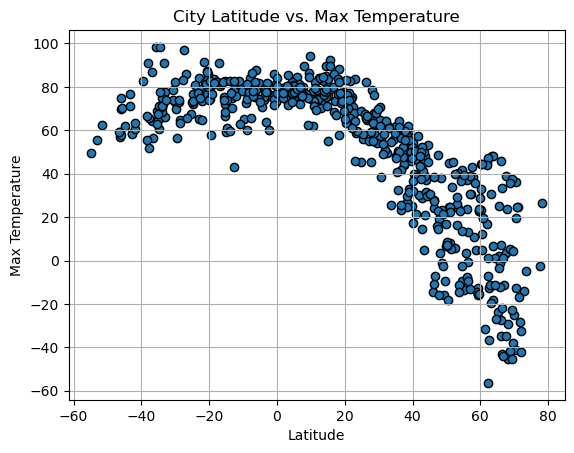

In [19]:
# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/MaxTemp_Scatter.png")

# Show plot
plt.show()

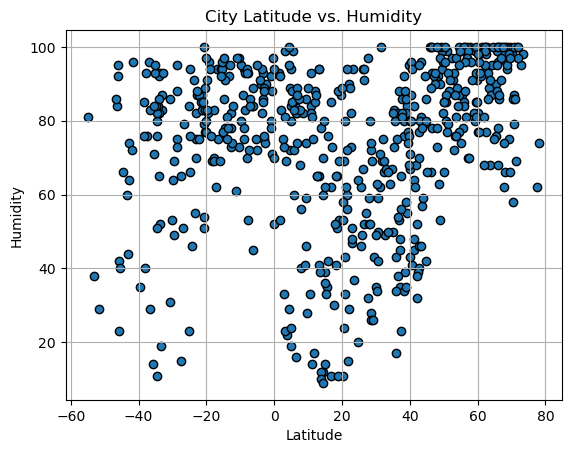

In [20]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Humidity_Scatter.png")

# Show plot
plt.show()

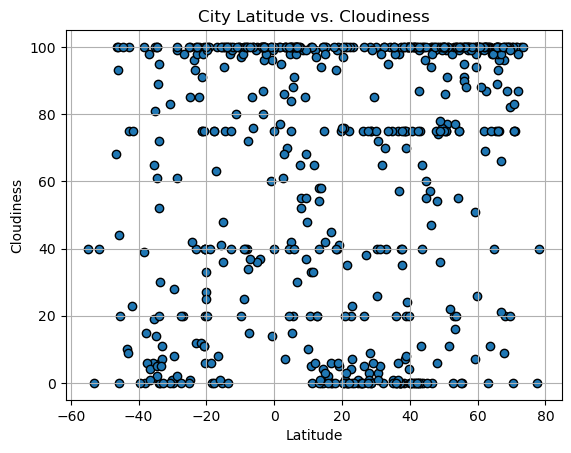

In [21]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Clouds_Scatter.png")

# Show plot
plt.show()

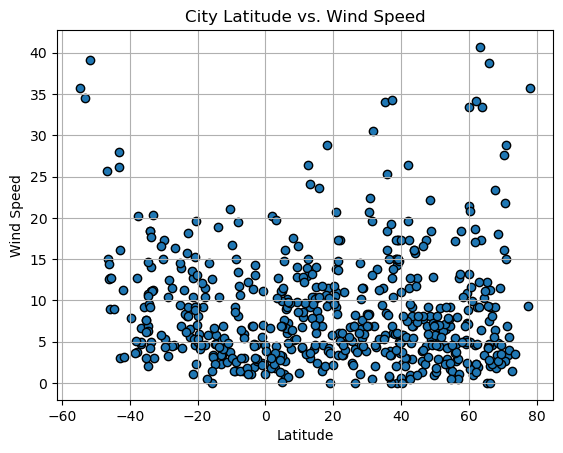

In [22]:
# Scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/WindSpeed_Scatter.png")

# Show plot
plt.show()

---

## Do these variables correlate? Linear Regression for each relationship

In [129]:
# Define Function to create linear regression plots
def my_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    print(f"The r-squared is: {rvalue**2}")


In [130]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,75.52,90,75,17.27,US,1675625133
2,tosno,59.5400,30.8775,22.84,85,100,7.25,RU,1675625099
6,qaanaaq,77.4840,-69.3632,-2.72,62,0,9.37,GL,1675625202
7,shelburne,44.0787,-80.2041,36.90,79,100,15.73,CA,1675625374
8,velenje,46.3592,15.1103,27.82,66,100,1.30,SI,1675625374


In [131]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,comodoro rivadavia,-45.8667,-67.5000,75.06,23,0,12.66,AR,1675625230
3,vila velha,-20.3297,-40.2925,85.95,77,20,19.57,BR,1675625372
4,kaitangata,-46.2817,169.8464,59.13,84,100,14.99,NZ,1675625373
5,cairns,-16.9167,145.7667,80.55,94,100,5.75,AU,1675625373
10,coquimbo,-29.9533,-71.3436,73.13,64,0,17.27,CL,1675625201


The r-squared is: 0.7351839043286197


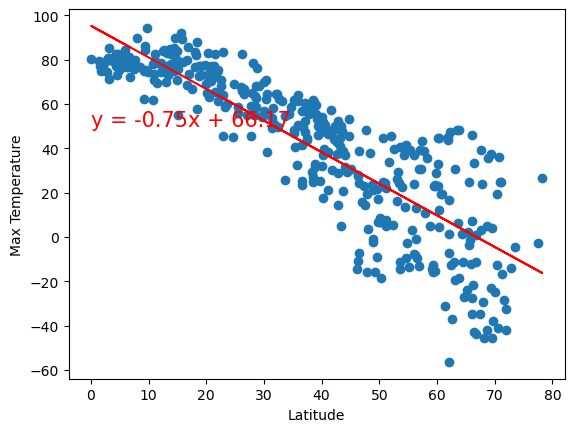

In [132]:
# Linear regression on Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()


The r-squared is: 0.12065975011703033


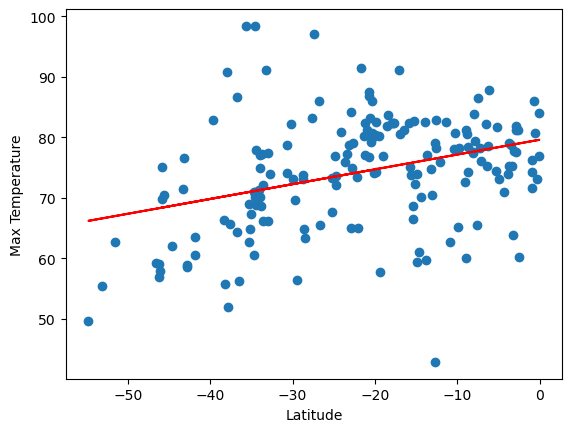

In [134]:
# Linear regression on Northern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

---

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2004163539818122


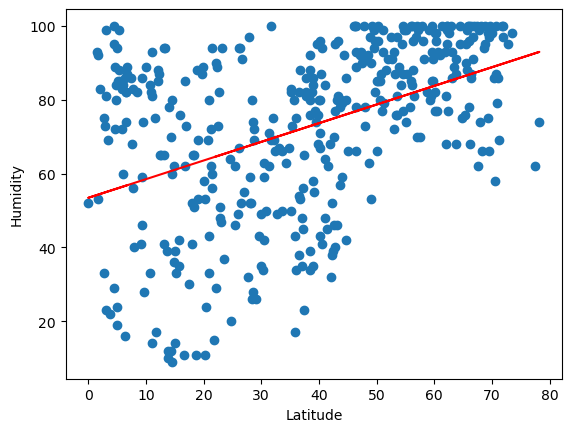

In [136]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.12952053273112088


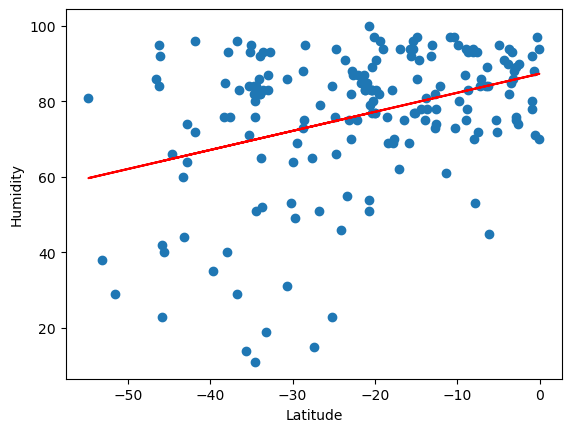

In [124]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

---

### Cloudiness vs. Latitude linear regression plot

The r-squared is: 0.05426379680683082


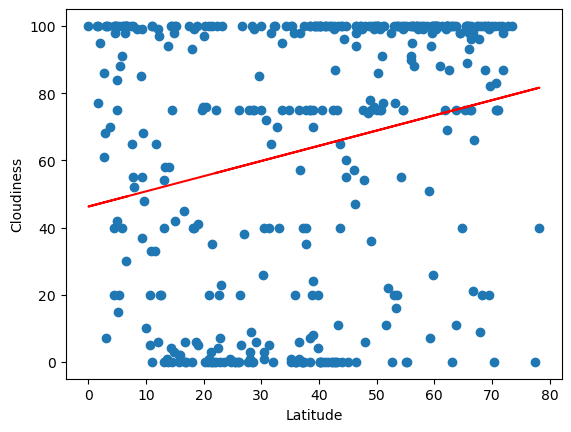

In [125]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.12273088667032989


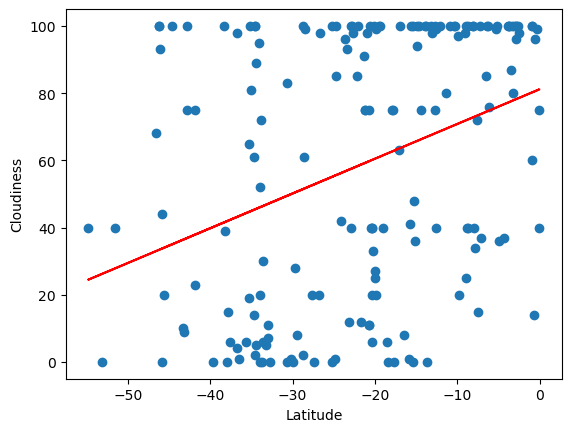

In [126]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

---

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0012583054257257627


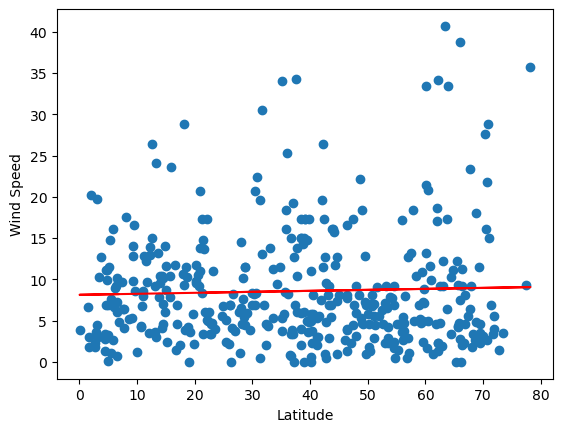

In [127]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: 0.21262861966790544


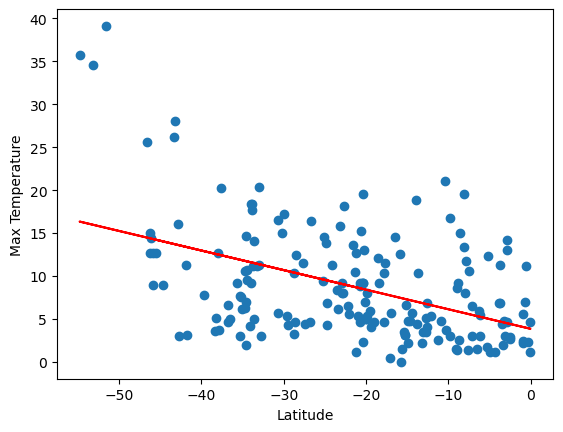

In [128]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()